# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [88]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [89]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [90]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [91]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [92]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [16]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
len(results.left_hand_landmarks.landmark)

21

In [18]:
results

mediapipe.python.solution_base.SolutionOutputs

In [19]:
draw_landmarks(frame, results)

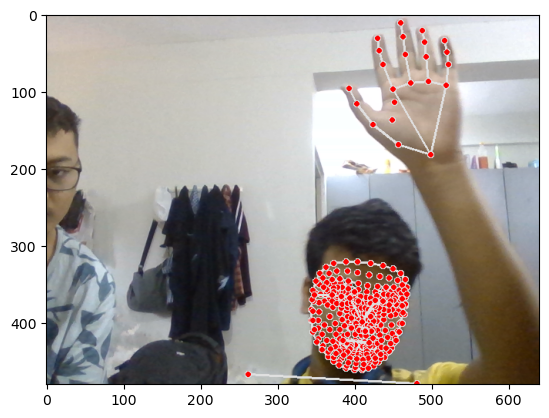

In [20]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [21]:
len(results.left_hand_landmarks.landmark)

21

In [22]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [23]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [25]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [26]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [27]:
result_test = extract_keypoints(results)

In [28]:
result_test

array([ 0.64138168,  0.83205456, -0.67896909, ...,  0.        ,
        0.        ,  0.        ])

In [29]:
468*3+33*4+21*3+21*3

1662

In [30]:
np.save('0', result_test)

In [31]:
np.load('0.npy')

array([ 0.64138168,  0.83205456, -0.67896909, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [77]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [33]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [1]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

NameError: name 'actions' is not defined

# 5. Collect Keypoint Values for Training and Testing

In [79]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(200)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [80]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [81]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [82]:
label_map = {label:num for num, label in enumerate(actions)}

In [83]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [84]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'MP_Data\\hello\\4\\24.npy'

In [ ]:
np.array(sequences).shape

In [ ]:
np.array(labels).shape

In [85]:
X = np.array(sequences)

In [86]:
X.shape

(4, 30, 1662)

In [87]:
y = to_categorical(labels).astype(int)

In [44]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [46]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [48]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [49]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [50]:
res = [.7, 0.2, 0.1]

In [51]:
actions[np.argmax(res)]

'hello'

In [52]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [53]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 272ms/step - loss: 2.4778 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 66ms/step - loss: 2.4008 - categorical_accuracy: 0.5294
Epoch 3/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.8506 - categorical_accuracy: 0.4588
Epoch 4/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.4303 - categorical_accuracy: 0.4353
Epoch 5/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.7666 - categorical_accuracy: 0.4706
Epoch 6/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.8720 - categorical_accuracy: 0.2471
Epoch 7/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.5789 - categorical_accuracy: 0.3059
Epoch 8/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.2212 - categorical_accuracy: 0.3765
Epoch 9/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.3808 - categorical_accuracy: 0.5176


3/3 [==============================] - 0s 74ms/step - loss: 0.1243 - categorical_accuracy: 0.9529
Epoch 147/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.2269 - categorical_accuracy: 0.9294
Epoch 148/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1846 - categorical_accuracy: 0.9294
Epoch 149/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1247 - categorical_accuracy: 0.9882
Epoch 150/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0968 - categorical_accuracy: 0.9882
Epoch 151/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0904 - categorical_accuracy: 0.9765
Epoch 152/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1005 - categorical_accuracy: 0.9765
Epoch 153/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0733 - categorical_accuracy: 0.9882
Epoch 154/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.0772 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 70ms/step - loss: 1.0054e-04 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 74ms/step - loss: 9.3854e-05 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 68ms/step - loss: 8.7976e-05 - categorical_accuracy: 1.0000
Epoch 293/2000
3/3 [==============================] - 0s 75ms/step - loss: 8.3013e-05 - categorical_accuracy: 1.0000
Epoch 294/2000
3/3 [==============================] - 0s 70ms/step - loss: 7.8483e-05 - categorical_accuracy: 1.0000
Epoch 295/2000
3/3 [==============================] - 0s 70ms/step - loss: 7.4030e-05 - categorical_accuracy: 1.0000
Epoch 296/2000
3/3 [==============================] - 0s 77ms/step - loss: 7.0164e-05 - categorical_accuracy: 1.0000
Epoch 297/2000
3/3 [==============================] - 0s 72ms/step - loss: 6.6766e-05 - categorical_accuracy: 1.0000
Epoch 298/2000
3/3 [==============================] - 0s 94ms/step - loss: 6.35

3/3 [==============================] - 0s 69ms/step - loss: 5.0362e-06 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 64ms/step - loss: 4.9829e-06 - categorical_accuracy: 1.0000
Epoch 432/2000
3/3 [==============================] - 0s 64ms/step - loss: 4.9549e-06 - categorical_accuracy: 1.0000
Epoch 433/2000
3/3 [==============================] - 0s 88ms/step - loss: 4.9030e-06 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 70ms/step - loss: 4.8623e-06 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 73ms/step - loss: 4.8230e-06 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 68ms/step - loss: 4.7782e-06 - categorical_accuracy: 1.0000
Epoch 437/2000
3/3 [==============================] - 0s 68ms/step - loss: 4.7347e-06 - categorical_accuracy: 1.0000
Epoch 438/2000
3/3 [==============================] - 0s 66ms/step - loss: 4.69

3/3 [==============================] - 0s 59ms/step - loss: 2.0153e-06 - categorical_accuracy: 1.0000
Epoch 571/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.0027e-06 - categorical_accuracy: 1.0000
Epoch 572/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.9985e-06 - categorical_accuracy: 1.0000
Epoch 573/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.9873e-06 - categorical_accuracy: 1.0000
Epoch 574/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.9789e-06 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.9634e-06 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.9522e-06 - categorical_accuracy: 1.0000
Epoch 577/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.9424e-06 - categorical_accuracy: 1.0000
Epoch 578/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.93

3/3 [==============================] - 0s 73ms/step - loss: 1.0350e-06 - categorical_accuracy: 1.0000
Epoch 711/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0350e-06 - categorical_accuracy: 1.0000
Epoch 712/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0266e-06 - categorical_accuracy: 1.0000
Epoch 713/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0210e-06 - categorical_accuracy: 1.0000
Epoch 714/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0210e-06 - categorical_accuracy: 1.0000
Epoch 715/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0112e-06 - categorical_accuracy: 1.0000
Epoch 716/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0112e-06 - categorical_accuracy: 1.0000
Epoch 717/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0042e-06 - categorical_accuracy: 1.0000
Epoch 718/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.00

3/3 [==============================] - 0s 71ms/step - loss: 5.6800e-07 - categorical_accuracy: 1.0000
Epoch 851/2000
3/3 [==============================] - 0s 66ms/step - loss: 5.6519e-07 - categorical_accuracy: 1.0000
Epoch 852/2000
3/3 [==============================] - 0s 72ms/step - loss: 5.6239e-07 - categorical_accuracy: 1.0000
Epoch 853/2000
3/3 [==============================] - 0s 69ms/step - loss: 5.6098e-07 - categorical_accuracy: 1.0000
Epoch 854/2000
3/3 [==============================] - 0s 67ms/step - loss: 5.5818e-07 - categorical_accuracy: 1.0000
Epoch 855/2000
3/3 [==============================] - 0s 70ms/step - loss: 5.5117e-07 - categorical_accuracy: 1.0000
Epoch 856/2000
3/3 [==============================] - 0s 65ms/step - loss: 5.5117e-07 - categorical_accuracy: 1.0000
Epoch 857/2000
3/3 [==============================] - 0s 73ms/step - loss: 5.4556e-07 - categorical_accuracy: 1.0000
Epoch 858/2000
3/3 [==============================] - 0s 68ms/step - loss: 5.45

3/3 [==============================] - 0s 70ms/step - loss: 3.2257e-07 - categorical_accuracy: 1.0000
Epoch 991/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.2257e-07 - categorical_accuracy: 1.0000
Epoch 992/2000
3/3 [==============================] - 0s 67ms/step - loss: 3.2257e-07 - categorical_accuracy: 1.0000
Epoch 993/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.2257e-07 - categorical_accuracy: 1.0000
Epoch 994/2000
3/3 [==============================] - 0s 71ms/step - loss: 3.2257e-07 - categorical_accuracy: 1.0000
Epoch 995/2000
3/3 [==============================] - 0s 77ms/step - loss: 3.2257e-07 - categorical_accuracy: 1.0000
Epoch 996/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.1836e-07 - categorical_accuracy: 1.0000
Epoch 997/2000
3/3 [==============================] - 0s 77ms/step - loss: 3.1415e-07 - categorical_accuracy: 1.0000
Epoch 998/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.15

3/3 [==============================] - 0s 64ms/step - loss: 2.0195e-07 - categorical_accuracy: 1.0000
Epoch 1129/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.0055e-07 - categorical_accuracy: 1.0000
Epoch 1130/2000
3/3 [==============================] - 0s 92ms/step - loss: 2.0055e-07 - categorical_accuracy: 1.0000
Epoch 1131/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.0055e-07 - categorical_accuracy: 1.0000
Epoch 1132/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.0055e-07 - categorical_accuracy: 1.0000
Epoch 1133/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.0055e-07 - categorical_accuracy: 1.0000
Epoch 1134/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.0055e-07 - categorical_accuracy: 1.0000
Epoch 1135/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.0195e-07 - categorical_accuracy: 1.0000
Epoch 1136/2000
3/3 [==============================] - 0s 79ms/step - lo

3/3 [==============================] - 0s 67ms/step - loss: 1.2622e-07 - categorical_accuracy: 1.0000
Epoch 1267/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.2622e-07 - categorical_accuracy: 1.0000
Epoch 1268/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.2622e-07 - categorical_accuracy: 1.0000
Epoch 1269/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.2622e-07 - categorical_accuracy: 1.0000
Epoch 1270/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.2622e-07 - categorical_accuracy: 1.0000
Epoch 1271/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.2622e-07 - categorical_accuracy: 1.0000
Epoch 1272/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.2482e-07 - categorical_accuracy: 1.0000
Epoch 1273/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.2482e-07 - categorical_accuracy: 1.0000
Epoch 1274/2000
3/3 [==============================] - 0s 72ms/step - lo

3/3 [==============================] - 0s 65ms/step - loss: 8.2745e-08 - categorical_accuracy: 1.0000
Epoch 1405/2000
3/3 [==============================] - 0s 69ms/step - loss: 8.1343e-08 - categorical_accuracy: 1.0000
Epoch 1406/2000
3/3 [==============================] - 0s 62ms/step - loss: 8.2745e-08 - categorical_accuracy: 1.0000
Epoch 1407/2000
3/3 [==============================] - 0s 68ms/step - loss: 7.9940e-08 - categorical_accuracy: 1.0000
Epoch 1408/2000
3/3 [==============================] - 0s 68ms/step - loss: 7.9940e-08 - categorical_accuracy: 1.0000
Epoch 1409/2000
3/3 [==============================] - 0s 63ms/step - loss: 7.9940e-08 - categorical_accuracy: 1.0000
Epoch 1410/2000
3/3 [==============================] - 0s 67ms/step - loss: 7.9940e-08 - categorical_accuracy: 1.0000
Epoch 1411/2000
3/3 [==============================] - 0s 67ms/step - loss: 7.9940e-08 - categorical_accuracy: 1.0000
Epoch 1412/2000
3/3 [==============================] - 0s 69ms/step - lo

3/3 [==============================] - 0s 72ms/step - loss: 6.3111e-08 - categorical_accuracy: 1.0000
Epoch 1543/2000
3/3 [==============================] - 0s 68ms/step - loss: 6.3111e-08 - categorical_accuracy: 1.0000
Epoch 1544/2000
3/3 [==============================] - 0s 74ms/step - loss: 6.4513e-08 - categorical_accuracy: 1.0000
Epoch 1545/2000
3/3 [==============================] - 0s 68ms/step - loss: 6.4513e-08 - categorical_accuracy: 1.0000
Epoch 1546/2000
3/3 [==============================] - 0s 71ms/step - loss: 6.4513e-08 - categorical_accuracy: 1.0000
Epoch 1547/2000
3/3 [==============================] - 0s 67ms/step - loss: 6.3111e-08 - categorical_accuracy: 1.0000
Epoch 1548/2000
3/3 [==============================] - 0s 71ms/step - loss: 6.3111e-08 - categorical_accuracy: 1.0000
Epoch 1549/2000
3/3 [==============================] - 0s 68ms/step - loss: 6.3111e-08 - categorical_accuracy: 1.0000
Epoch 1550/2000
3/3 [==============================] - 0s 75ms/step - lo

3/3 [==============================] - 0s 74ms/step - loss: 3.6464e-08 - categorical_accuracy: 1.0000
Epoch 1681/2000
3/3 [==============================] - 0s 70ms/step - loss: 3.5062e-08 - categorical_accuracy: 1.0000
Epoch 1682/2000
3/3 [==============================] - 0s 70ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1683/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.5062e-08 - categorical_accuracy: 1.0000
Epoch 1684/2000
3/3 [==============================] - 0s 71ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1685/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1686/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1687/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1688/2000
3/3 [==============================] - 0s 72ms/step - lo

3/3 [==============================] - 0s 70ms/step - loss: 2.5244e-08 - categorical_accuracy: 1.0000
Epoch 1819/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.6647e-08 - categorical_accuracy: 1.0000
Epoch 1820/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.6647e-08 - categorical_accuracy: 1.0000
Epoch 1821/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.5244e-08 - categorical_accuracy: 1.0000
Epoch 1822/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.6647e-08 - categorical_accuracy: 1.0000
Epoch 1823/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.6647e-08 - categorical_accuracy: 1.0000
Epoch 1824/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.5244e-08 - categorical_accuracy: 1.0000
Epoch 1825/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.5244e-08 - categorical_accuracy: 1.0000
Epoch 1826/2000
3/3 [==============================] - 0s 73ms/step - lo

3/3 [==============================] - 0s 76ms/step - loss: 1.5427e-08 - categorical_accuracy: 1.0000
Epoch 1957/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.1037e-08 - categorical_accuracy: 1.0000
Epoch 1958/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.2439e-08 - categorical_accuracy: 1.0000
Epoch 1959/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.3842e-08 - categorical_accuracy: 1.0000
Epoch 1960/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.3842e-08 - categorical_accuracy: 1.0000
Epoch 1961/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.6830e-08 - categorical_accuracy: 1.0000
Epoch 1962/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.5427e-08 - categorical_accuracy: 1.0000
Epoch 1963/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.5427e-08 - categorical_accuracy: 1.0000
Epoch 1964/2000
3/3 [==============================] - 0s 69ms/step - lo

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [55]:
res = model.predict(X_test)

In [56]:
actions[np.argmax(res[4])]

'hello'

In [57]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [58]:
model.save('action.h5')

In [217]:
del model

In [59]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [60]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [61]:
yhat = model.predict(X_test)

In [62]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [63]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [64]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [75]:
import numpy as np
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        prob_mean = np.mean(prob)  # convert prob to a scalar value
        if num < len(colors):
            cv2.rectangle(output_frame, (0,60+num*40), (int(prob_mean*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [76]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

IndexError: index 3 is out of bounds for axis 0 with size 3

<Figure size 1800x1800 with 0 Axes>

In [19]:
sequence.reverse()

In [23]:
len(sequence)

1

In [51]:
sequence.append('def')

In [34]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [20]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)